In [1]:
%load_ext sppl.magics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%%sppl model

from sppl.sym_util import binspace
from scipy.stats import poisson as p

# Students.
num_students       = 2
student_perfect    = array(num_students)
student_gpa        = array(num_students)
student_interviews = array(num_students)
student_offers     = array(num_students)

# For each student, sample GPA.
for s in range(num_students):
    student_perfect[s] ~= bernoulli(p=.2)
    if (student_perfect[s] == 0):
        student_gpa[s] ~= beta(a=7, b=3, scale=4)
    else:
        student_gpa[s] ~= atomic(loc=4)
        
# Sample number of recruiters
num_recruiters ~= poisson(mu=25)
condition ((10 <= num_recruiters) <= 40)

# Switch on number of recruiters.
switch (num_recruiters) cases (n in range(10, 41)):

    # For each student, sample interviews and offers.
    for j in range(num_students):
        student_interviews[j] ~= \
            binom(n=n, p=0.9) if (student_gpa[j] == 4)  else \
            binom(n=n, p=0.6) if ((3.5 < student_gpa[j]) < 4) else \
            binom(n=n, p=0.5)

        # Switch on number of interviews.
        switch (student_interviews[j]) cases (k in range(0, n+1)):
            student_offers[j] ~= binom(n=k, p=0.4)

In [3]:
n = %sppl_get_namespace model

In [4]:
modelc = n.model.condition((n.student_offers[0] << {1}) & (n.num_recruiters > 30))

In [5]:
import numpy as np
xs = np.linspace(0, 4, 20)
gpa_prior = [n.model.prob(n.student_gpa[0] < i ) for i in xs]
gpa_posterior = [modelc.prob(n.student_gpa[0] <i ) for i in xs]

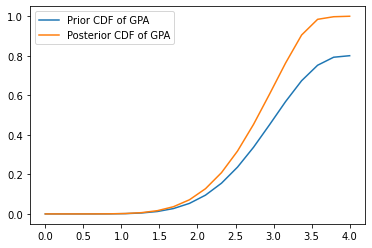

In [6]:
fig, ax = plt.subplots()
ax.plot(xs, gpa_prior, label='Prior CDF of GPA')
ax.plot(xs, gpa_posterior, label='Posterior CDF of GPA')
ax.legend(loc='upper left')